# Task 3: Exploratory Data Analysis

In [6]:
#imports
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics as stat
from scripts import project_functions

### Firstly we will show a histogram of the age, charges, and number of children of the population.

In [7]:
data = project_functions.load_n_wrangle('insurance.csv')

/Users/seanripley/Desktop/ubc/2021S/DATA301/project-group42-project/analysis/sean-ripley/scripts/project_functions.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data


/Users/seanripley/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(**kwargs)
/Users/seanripley/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(**kwargs)
/Users/seanripley/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:49: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax.set(**kwargs)


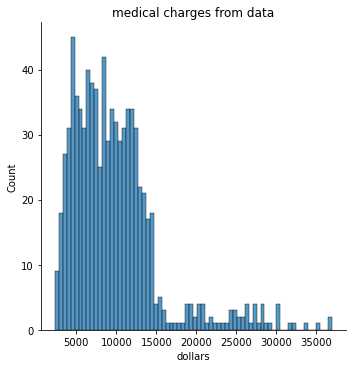

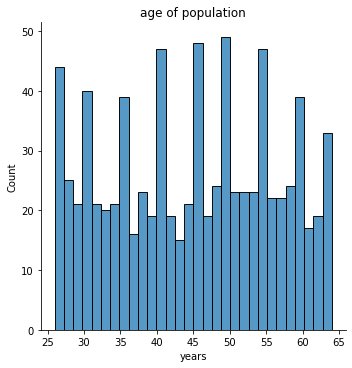

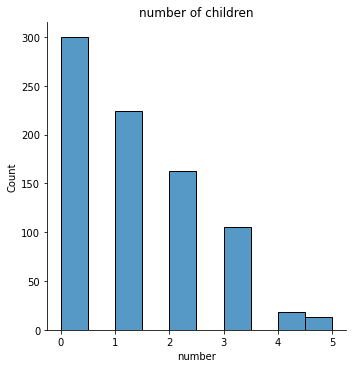

In [12]:
sns.displot(data = data ,  palette = "colorblind" , x = "charges" , bins = 70).set(
            Title = "medical charges from data" , 
            xlabel = 'dollars')
sns.displot(data = data ,  palette = "colorblind" , x = "age" , bins = 30).set(
            Title = "age of population" , 
            xlabel = 'years')
sns.displot(data = data ,  palette = "colorblind" , x = "children" , bins = 10).set(
            Title = "number of children" , 
            xlabel = 'number')

From the first graph of charges it looks like most of the data falls around ~9k.

From the middle graph: we got a real nice even spread over the pop. range of 25-65.

From the bottom graph: our data is skewd towards non-parents but thats okay.

## Graphing 'amount charged' versus 'number of children' 

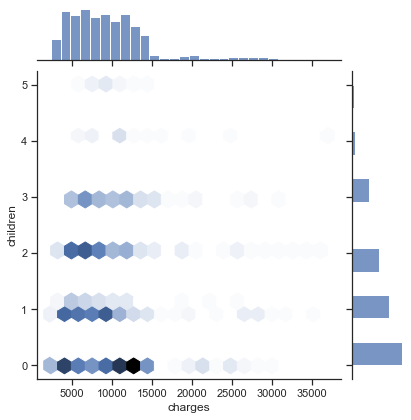

In [34]:
### male
sns.set_theme(style="ticks")
sns.jointplot( data = data , y = "children" 
              , x = "charges" , kind = 'hex')


Most of the numbers we get are concentrated at low charges and few children, but it is taller than it is wide so that might indicate a corrolation. We need to eliminate the data 'bulges' in the charges and children data in order to get a better picture. We can do that by averaging charges while holding the number of children constant. That way we wont get drowned by too much data at the lower end.

### Graph scatter of average charge for each children value

   average charge  no. of children
0            9981                0
1            9054                1
2            9592                2
3           10169                3
4           13088                4
5            9200                5


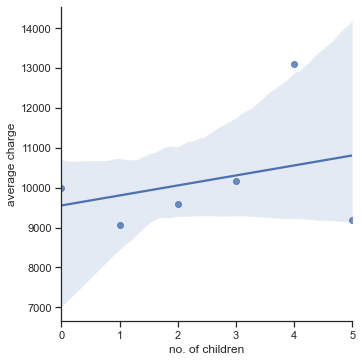

In [64]:
## getting averages

ChildZerodata = data[data["children"]== 0]
ChildZerodata = int(np.mean(ChildZerodata['charges']))

ChildOnedata = data[data["children"]== 1]
ChildOnedata = int(np.mean(ChildOnedata['charges']))

ChildTwodata = data[data["children"]== 2]
ChildTwodata = int(np.mean(ChildTwodata['charges']))

ChildThreedata = data[data["children"]== 3]
ChildThreedata = int(np.mean(ChildThreedata['charges']))

ChildFourdata = data[data["children"]== 4]
ChildFourdata = int(np.mean(ChildFourdata['charges']))

ChildFivedata = data[data["children"]== 5]
ChildFivedata = int(np.mean(ChildFivedata['charges']))

## building df from lists of averages to graph
child_data = [[ChildZerodata, 0] , [ChildOnedata, 1] , [ChildTwodata, 2] ,
              [ChildThreedata, 3] , [ChildFourdata, 4] , [ChildFivedata ,5]]
child_df = pd.DataFrame(data = child_data , columns = ['average charge' , 'no. of children'])
print(child_df)

## graphing
sns.lmplot(data = child_df, palette = "colorblind" , x = 'no. of children' , y = 'average charge')

Okay now we have a better picture. It looks like from zero to one children we drop and then gain until we drop again at 5 children. Broadly speaking, our best fit line indicates a positive correlation between number of children and average charges.